In [1]:
using DrWatson

In [2]:
@quickactivate "RxInferThesisExperiments"

In [3]:
using RxInferThesisExperiments, Plots, PGFPlotsX, LaTeXStrings
using LinearAlgebra, StableRNGs, Random, BenchmarkTools, ColorSchemes, Dates, DataFrames

import RxInfer, ReactiveMP, ForneyLab, Turing

[ Info: Precompiling RxInferThesisExperiments [45155ac3-0a9e-41cf-b3f8-8307b1a2d51a]


In [93]:
pgfplotsx()

# gr()

Plots.PGFPlotsXBackend()

In [78]:
const outfolder = plotsdir("nlds", "common")

"/Users/bvdmitri/.julia/dev/thesis/plots/nlds/common"

In [5]:
mkpath(outfolder);

In [126]:
rxinfer_benchmarks = prepare_benchmarks_table(datadir("nlds", "rxinfer"));

# Select only a portion of benchmarks
rxinfer_target_niteration = 3
rxinfer_target_seed = 42

rxifb = filter(rxinfer_benchmarks) do r 
    return r["niterations"] == rxinfer_target_niteration && r["seed"] == rxinfer_target_seed
end

rxifb = sort(rxifb, [ :T ])

# RxInfer includes the model creation time in it
rxi_inference = getindex.(rxifb.inference, 1) .- getindex.(rxifb.inference, 3)
rxi_creation  = getindex.(rxifb.creation, 1) .- getindex.(rxifb.creation, 3)

rxi_min_timing_range = min(minimum(rxi_inference), minimum(rxi_creation))
rxi_max_timing_range = max(maximum(rxi_inference), maximum(rxi_creation))

nothing

[ Info: Scanning folder /Users/bvdmitri/.julia/dev/thesis/data/nlds/rxinfer for result files.
[ Info: Added 22 entries.


In [127]:
forneylab_benchmarks = prepare_benchmarks_table(datadir("nlds", "forneylab"));

# Select only a portion of benchmarks
fl_target_niteration = 3
fl_target_seed = 42

flfb = filter(forneylab_benchmarks) do r 
    return r["niterations"] == fl_target_niteration && r["seed"] == fl_target_seed
end

flfb = sort(flfb, [ :T ])

# ForneyLab does not include the model creation time in it
fl_inference = getindex.(flfb.inference, 1) .- getindex.(flfb.inference, 3)
fl_creation  = getindex.(flfb.creation, 1) .- getindex.(flfb.creation, 3)

fl_min_timing_range = min(minimum(fl_inference), minimum(fl_creation))
fl_max_timing_range = max(maximum(fl_inference), maximum(fl_creation))

nothing

[ Info: Scanning folder /Users/bvdmitri/.julia/dev/thesis/data/nlds/forneylab for result files.
[ Info: Added 8 entries.


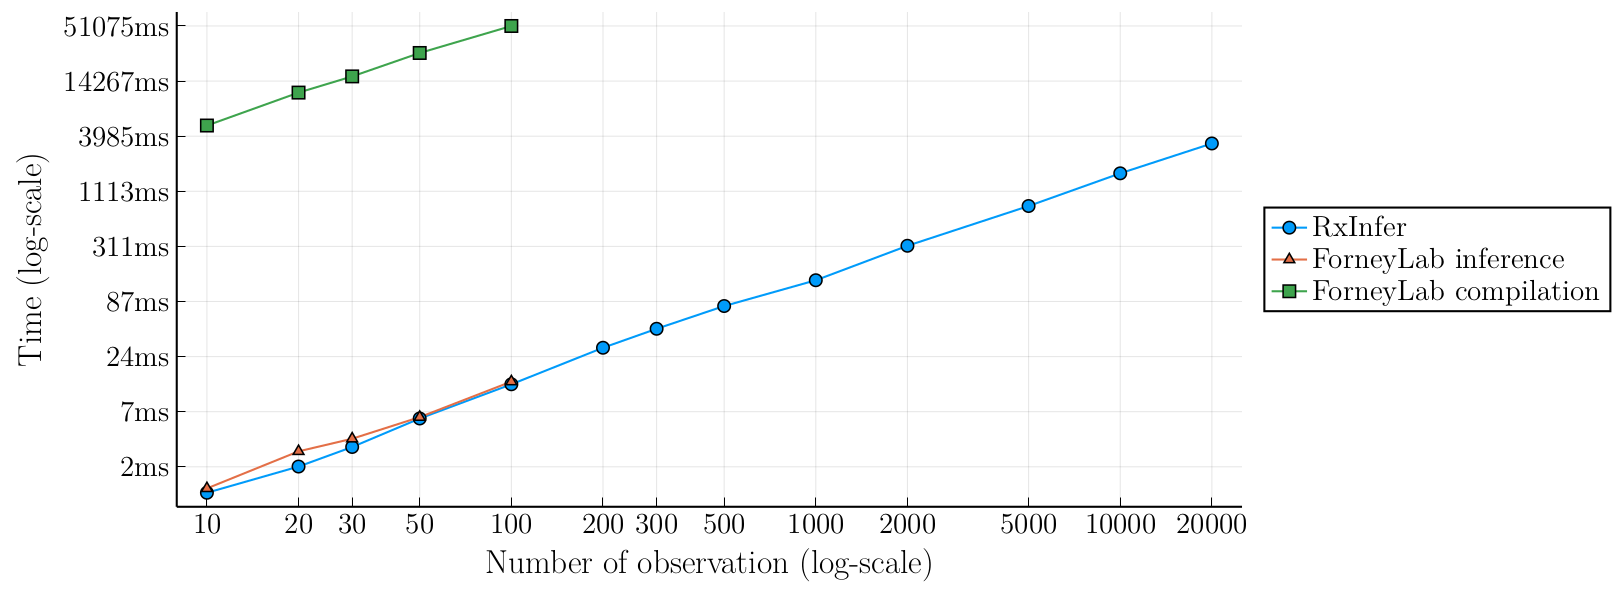

In [128]:
min_timing_range = min(rxi_min_timing_range, fl_min_timing_range)
max_timing_range = max(rxi_max_timing_range, fl_max_timing_range)

timing_range = exp.(range(log(min_timing_range), log(max_timing_range); length = 10))
sizes_range = sort(collect(union(rxifb.T, flfb.T)))

yticks = (timing_range, replace.(to_ms_str.(timing_range; digits = 0), ".0" => ""))
xticks = (sizes_range, string.(sizes_range))

pfontsettings = (
    titlefontsize=18,
    guidefontsize=16,
    tickfontsize=14,
    legendfontsize=14,
    legend_font_halign = :left
)

p = plot(
    size = (800, 400),
    yscale = :log10, xscale = :log10, yticks = yticks, xticks = xticks, 
    ylabel = "Time (log-scale)", xlabel = "Number of observation (log-scale)",
    legend = :outerright;
    pfontsettings...
)

p = plot!(p, rxifb.T, rxi_inference, label = "RxInfer", marker = :circle)
p = plot!(p, flfb.T, fl_inference, label = "ForneyLab inference", marker = :utriangle)
p = plot!(p, flfb.T, fl_creation, label = "ForneyLab compilation", marker = :rect)

In [121]:
Plots.attrtypes()

"Series, Subplot, Plot, Axis"

In [124]:
@show Plots.attributes(:Subplot )

Plots.attributes(:Subplot) = [:annotationcolor, :annotationfontfamily, :annotationfontsize, :annotationhalign, :annotationrotation, :annotations, :annotationvalign, :aspect_ratio, :background_color_inside, :background_color_subplot, :bottom_margin, :camera, :clims, :color_palette, :colorbar, :colorbar_continuous_values, :colorbar_discrete_values, :colorbar_fontfamily, :colorbar_formatter, :colorbar_scale, :colorbar_tickfontcolor, :colorbar_tickfontfamily, :colorbar_tickfonthalign, :colorbar_tickfontrotation, :colorbar_tickfontsize, :colorbar_tickfontvalign, :colorbar_ticks, :colorbar_title, :colorbar_title_location, :colorbar_titlefontcolor, :colorbar_titlefontfamily, :colorbar_titlefonthalign, :colorbar_titlefontrotation, :colorbar_titlefontsize, :colorbar_titlefontvalign, :extra_kwargs, :fontfamily_subplot, :foreground_color_subplot, :foreground_color_title, :framestyle, :left_margin, :legend_background_color, :legend_column, :legend_font, :legend_font_color, :legend_font_family, :le

74-element Vector{Symbol}:
 :annotationcolor
 :annotationfontfamily
 :annotationfontsize
 :annotationhalign
 :annotationrotation
 :annotations
 :annotationvalign
 :aspect_ratio
 :background_color_inside
 :background_color_subplot
 :bottom_margin
 :camera
 :clims
 ⋮
 :projection_type
 :right_margin
 :subplot_index
 :title
 :titlefontcolor
 :titlefontfamily
 :titlefonthalign
 :titlefontrotation
 :titlefontsize
 :titlefontvalign
 :titlelocation
 :top_margin